<IPython.core.display.Javascript object>


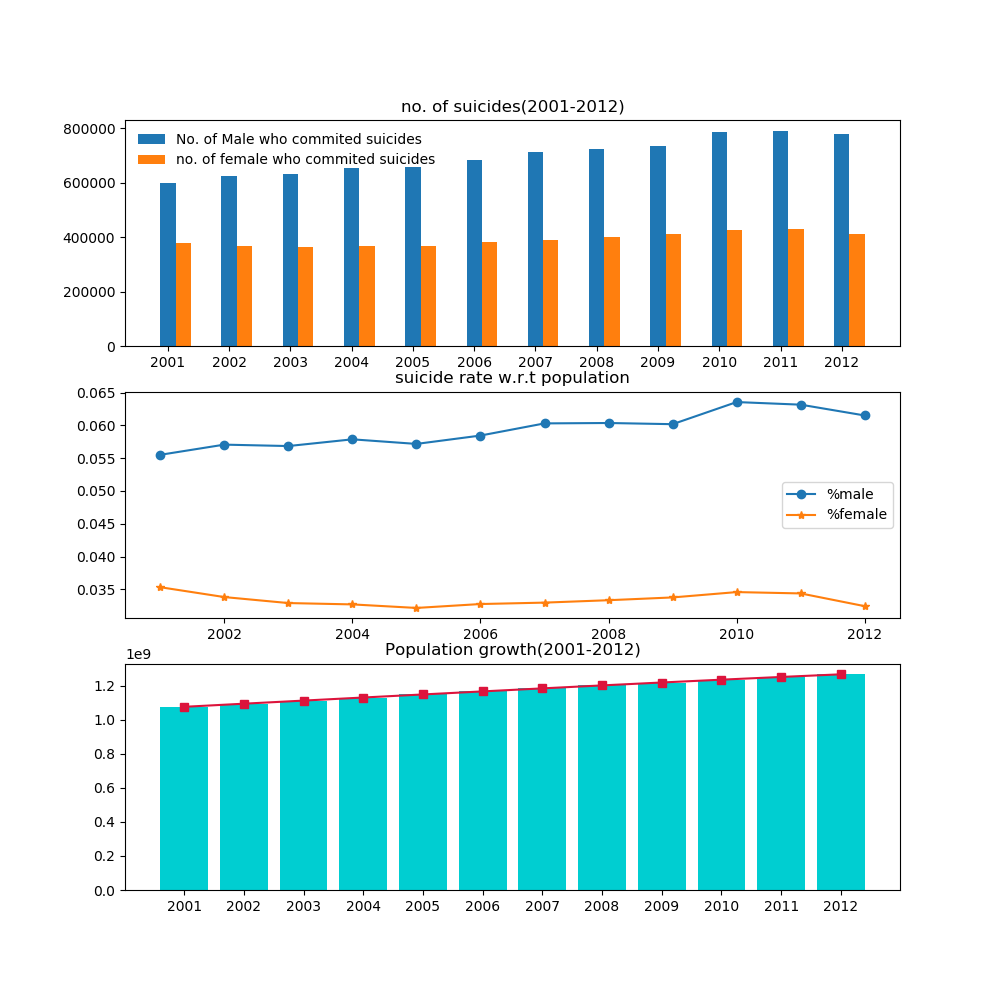

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn-colorblind')
%matplotlib notebook


# reading and cleaning the first dataset
df=pd.read_csv(r"C:\Users\DELL\Downloads\suicides_in_india.csv")
df=df[['State','Year','Gender','Age_group','Total']]
df=df.groupby(['Year','Gender',])['Total'].sum()
df=pd.DataFrame(df)
df=df.reset_index()
men=df[df['Gender']=='Male']
men=men.rename(columns={'Total':'Male'}).drop('Gender',1)
women=df[df['Gender']=='Female']
women=women.rename(columns={'Total':'Female'}).drop('Gender',1)
result=pd.merge(men,women,how='outer', on='Year')
result=result.set_index('Year')





# reading and cleaning the second dataset 

census=pd.read_excel(r'C:\Users\DELL\Desktop\world.xlsx')
census=census[census['Country Name']=='India']
census=census.T
census=census[45:57]
census=census.reset_index()
census=census.rename(columns={'index':'Year',107:'Population'})

answer=pd.merge(result,census,on='Year')
answer=answer.set_index('Year')

ans=answer.copy()
ans=ans.drop(['Male','Female'],1)

answer['%male']=(answer['Male']/answer['Population'])*100
answer['%female']=(answer['Female']/answer['Population'])*100
answer['population']=answer['Population']/answer['Population']
answer=answer.drop(['Male','Female'],1)


x=np.arange(2001,2013,1)
y1=answer['%male'].tolist()
y2=answer['%female'].tolist()
y3=result['Male'].tolist()
y4=ans['Population'].tolist()
y5=result['Female'].tolist()

plt.figure(figsize=(10,10))

ax1=plt.subplot(3,1,1)
ax1.set_title('no. of suicides(2001-2012)')


plt.bar(x,y3,0.25, label='No. of Male who commited suicides' )
plt.bar(x+0.25,y5,0.25,label='no. of female who commited suicides')
plt.xticks(np.arange(2001,2013,1))
plt.legend(frameon=False)
ax2=plt.subplot(3,1,2)
ax2.set_title('suicide rate w.r.t population')
plt.plot(x,y1,'-o',label='%male')
plt.plot(x,y2,'-*',label='%female')
plt.legend()
ax3=plt.subplot(3,1,3)
ax3.set_title('Population growth(2001-2012)')
plt.bar(x,y4,color='darkturquoise')
plt.plot(x,y4,'-s',color='crimson')
plt.xticks(np.arange(2001,2013,1));
plt.show()

